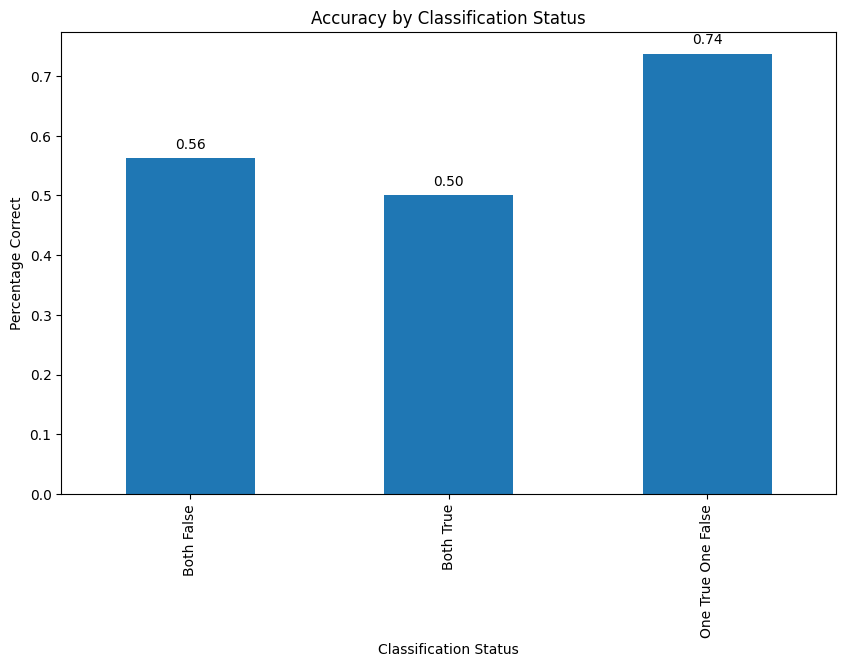

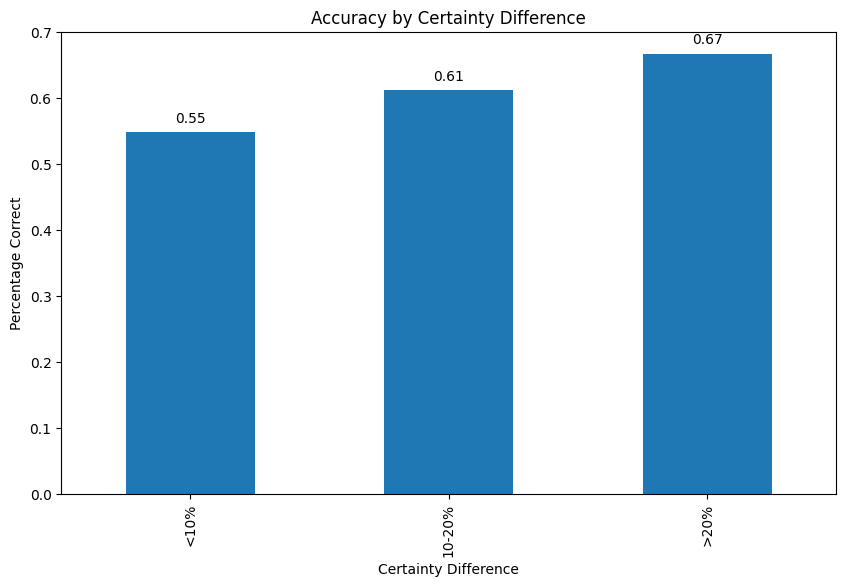

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

# Load the data from the JSON file
with open('LIAR-Evaluated.json', 'r') as f:
    data = json.load(f)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

def clean_percentage(value):
    if isinstance(value, str):
        match = re.search(r'\d+(?:\.\d+)?', value)
        if match:
            return float(match.group())
    return value

# Clean the true certainties
df['true certainty1'] = df['true certainty1'].apply(clean_percentage)
df['true certainty2'] = df['true certainty2'].apply(clean_percentage)

# Calculate the difference in true certainties
df['certainty difference'] = abs(df['true certainty1'] - df['true certainty2'])

# Calculate whether the prediction was correct
df['correct'] = df['prediction'] == df['truth']

# Create a new column for the classification status
df['classification1'] = df['classification1'].str.lower()
df['classification2'] = df['classification2'].str.lower()

df['classification status'] = 'One True One False'
df.loc[(df['classification1'] == 'true') & (df['classification2'] == 'true'), 'classification status'] = 'Both True'
df.loc[(df['classification1'] == 'false') & (df['classification2'] == 'false'), 'classification status'] = 'Both False'

# Plot the accuracy by classification status
plt.figure(figsize=(10, 6))
ax = df.groupby('classification status')['correct'].mean().plot(kind='bar')
plt.title('Accuracy by Classification Status')
plt.xlabel('Classification Status')
plt.ylabel('Percentage Correct')

# Add the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# Define bins for the certainty difference
bins = [0, 10, 20, df['certainty difference'].max()]
labels = ['<10%', '10-20%', '>20%']
df['certainty difference bin'] = pd.cut(df['certainty difference'], bins=bins, labels=labels)

# Plot the accuracy by certainty difference
plt.figure(figsize=(10, 6))
ax = df.groupby('certainty difference bin')['correct'].mean().plot(kind='bar')
plt.title('Accuracy by Certainty Difference')
plt.xlabel('Certainty Difference')
plt.ylabel('Percentage Correct')

# Add the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()